In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
from transformers import TFAutoModel, AutoTokenizer


model = TFAutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/529M [00:00<?, ?B/s]

Some layers from the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
input = tokenizer(['Ola, mundo!', 'oi, como estas gostaria de sair'], padding=True, truncation=True)
input

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': [[101, 17553, 117, 1147, 106, 102, 0, 0, 0, 0], [101, 146, 22283, 117, 271, 3769, 21454, 125, 5197, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
import pandas as pd

df = pd.read_csv('2019-05-28_portuguese_hate_speech_binary_classification.csv')

In [ ]:
df = df[["text", "hatespeech_comb"]]

df.columns = ["text", "label"]

df.dropna(inplace=True)

df["label"] = df["label"].astype(int)

df.to_csv("processed_dataset.csv", index=False)

<ipython-input-4-43bb57b18351>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-4-43bb57b18351>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = df["label"].astype(int)


In [ ]:
df['label'].value_counts()

,count
label,
0,3882
1,1788


<Axes: xlabel='label'>

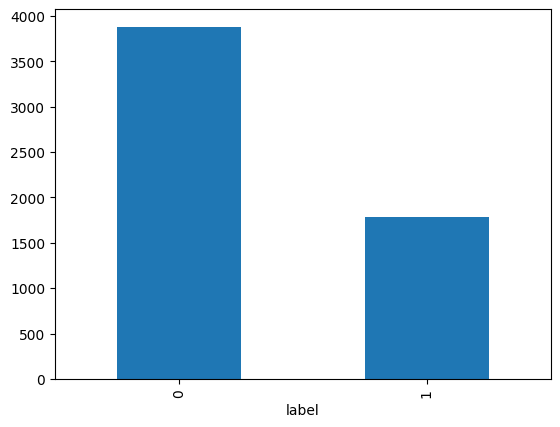

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
df.isnull().sum()

,0
text,0
label,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train set: {len(train_df)} rows")
print(f"Validation set: {len(val_df)} rows")
print(f"Test set: {len(test_df)} rows")

Train set: 4536 rows
Validation set: 567 rows
Test set: 567 rows


In [ ]:
# Salvar os dados em arquivos CSV
train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [ ]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'train': 'train.csv', 'validation': 'val.csv', 'test': 'test.csv'})

In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import torch

In [ ]:
model_name = 'neuralmind/bert-large-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
from datasets import load_dataset

dataset = load_dataset('csv', data_files={'train': 'train.csv', 'validation': 'val.csv', 'test': 'test.csv'})

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenized_datasets = tokenized_datasets.rename_column("label", "labels")  # Rename label to labels
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to="none"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

trainer.train()

Step,Training Loss
10,0.274300
20,0.214800
30,0.099500
40,0.242400
50,0.219200
60,0.309700
70,0.315900
80,0.128900
90,0.106500
100,0.193000


TrainOutput(global_step=1701, training_loss=0.23146853571689782, metrics={'train_runtime': 1616.1121, 'train_samples_per_second': 8.42, 'train_steps_per_second': 1.053, 'total_flos': 3170430498041856.0, 'train_loss': 0.23146853571689782, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()

{'eval_loss': 1.006550908088684, 'eval_runtime': 14.545, 'eval_samples_per_second': 38.983, 'eval_steps_per_second': 2.475, 'epoch': 3.0}


In [ ]:
texts = [
    "O curso é excelente! Porém, seria bom se o professor falasse mais alto,  pois quase não deu para ouvir",
    "O filme apresenta uma narrativa coesa, que se constrói nos pequenos acontecimentos, nos detalhes sutis, beirando o misticismo. O mistério vai se desvelando e o oculto vai se intensificando conforme vai chegando o final. O filme é construído em partes na qual formam uma história com começo, meio e fim, bem amarrada. Acredito fielmente que a versão com as cenas do diretor, mais longa, terá ainda mais a construção dos personagens. Ela é uma negra fedorenta"
]

inputs = tokenizer(texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

inputs = inputs.to(device)
outputs = model(**inputs)

predictions = outputs.logits.argmax(axis=-1)

labels = ["Não é hate speech", "É hate speech"]
predicted_classes = [labels[p] for p in predictions]

for text, label in zip(texts, predicted_classes):
    print(f"Texto: {text}\nPrevisão: {label}\n")

Texto: O curso é excelente! Porém, seria bom se o professor falasse mais alto, pois quase não deu para ouvir, chupa minha pica
Previsão: É hate speech

Texto: O filme apresenta uma narrativa coesa, que se constrói nos pequenos acontecimentos, nos detalhes sutis, beirando o misticismo. O mistério vai se desvelando e o oculto vai se intensificando conforme vai chegando o final. O filme é construído em partes na qual formam uma história com começo, meio e fim, bem amarrada. Acredito fielmente que a versão com as cenas do diretor, mais longa, terá ainda mais a construção dos personagens. Ela é uma negra fedorenta
Previsão: É hate speech

